In [49]:
import pandas as pd

df = pd.read_csv('67f1692635fda.csv')
df.head()


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [50]:
df.shape


(100000, 11)

In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [52]:
df.isna().sum()


,0
Order ID,0
Customer ID,0
Platform,0
Order Date & Time,0
Delivery Time (Minutes),0
Product Category,0
Order Value (INR),0
Customer Feedback,0
Service Rating,0
Delivery Delay,0


In [53]:
df.duplicated().sum()


np.int64(0)

In [54]:
df.columns = df.columns.str.strip()
df.columns


Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [55]:
df['Order Value (INR)'] = pd.to_numeric(df['Order Value (INR)'], errors='coerce')
df['Delivery Time (Minutes)'] = pd.to_numeric(df['Delivery Time (Minutes)'], errors='coerce')
df['Service Rating'] = pd.to_numeric(df['Service Rating'], errors='coerce')


In [56]:
total_orders = df.shape[0]
total_orders


100000

In [57]:
df['Delivery Time (Minutes)'].mean()


np.float64(29.53614)

In [58]:
(df['Delivery Delay'].value_counts(normalize=True) * 100)


,proportion
Delivery Delay,
No,86.328
Yes,13.672


In [59]:
platform_perf = df.groupby('Platform').agg(
    total_orders=('Order ID', 'count'),
    avg_delivery_time=('Delivery Time (Minutes)', 'mean'),
    delayed_orders=('Delivery Delay', lambda x: (x == 'Yes').sum())
).reset_index()

platform_perf


,Platform,total_orders,avg_delivery_time,delayed_orders
0,Blinkit,33424,29.474898,4473
1,JioMart,33127,29.634498,4580
2,Swiggy Instamart,33449,29.499925,4619


In [60]:
category_perf = df.groupby('Product Category').agg(
    total_orders=('Order ID', 'count'),
    revenue=('Order Value (INR)', 'sum'),
    avg_delivery_time=('Delivery Time (Minutes)', 'mean')
).sort_values(by='revenue', ascending=False)

category_perf


,total_orders,revenue,avg_delivery_time
Product Category,,,
Personal Care,16533,17395601,29.571584
Grocery,16737,14194055,29.580689
Beverages,16536,9086669,29.503568
Dairy,16857,7610522,29.560657
Fruits & Vegetables,16632,6246517,29.551467
Snacks,16705,4566076,29.448668


In [61]:
df.groupby('Delivery Delay')['Service Rating'].mean()


,Service Rating
Delivery Delay,
No,3.242436
Yes,3.230398


In [62]:
refund_analysis = df.groupby('Delivery Delay').agg(
    total_orders=('Order ID', 'count'),
    refund_count=('Refund Requested', lambda x: (x == 'Yes').sum())
)

refund_analysis


,total_orders,refund_count
Delivery Delay,,
No,86328,39521
Yes,13672,6298


In [63]:
top_customers = df.groupby('Customer ID')['Order Value (INR)'].sum().sort_values(ascending=False).head(10)
top_customers


,Order Value (INR)
Customer ID,
CUST9682,16255
CUST1605,16185
CUST9084,15547
CUST5386,15467
CUST2175,15209
CUST8779,14782
CUST8613,14729
CUST5009,14712
CUST5333,14601


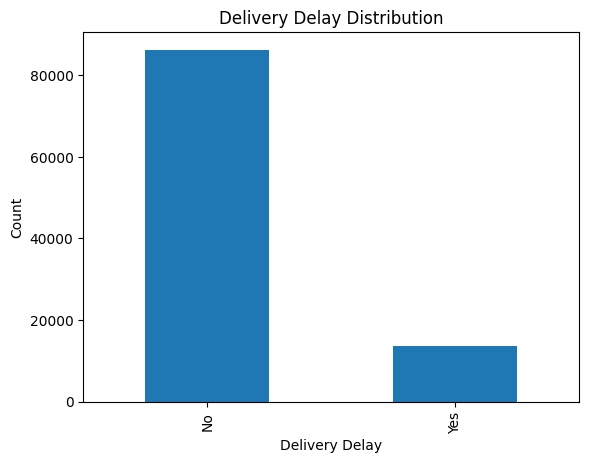

In [64]:
import matplotlib.pyplot as plt

df['Delivery Delay'].value_counts().plot(kind='bar')
plt.title('Delivery Delay Distribution')
plt.xlabel('Delivery Delay')
plt.ylabel('Count')
plt.show()


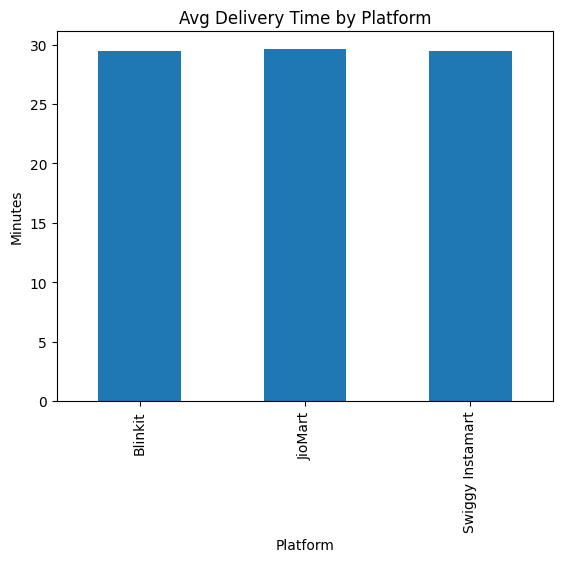

In [65]:
platform_perf.set_index('Platform')['avg_delivery_time'].plot(kind='bar')
plt.title('Avg Delivery Time by Platform')
plt.ylabel('Minutes')
plt.show()


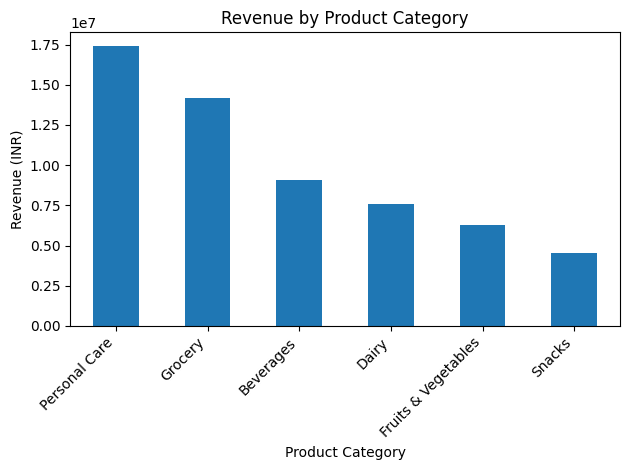

In [66]:
import matplotlib.pyplot as plt

category_perf['revenue'].plot(kind='bar')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

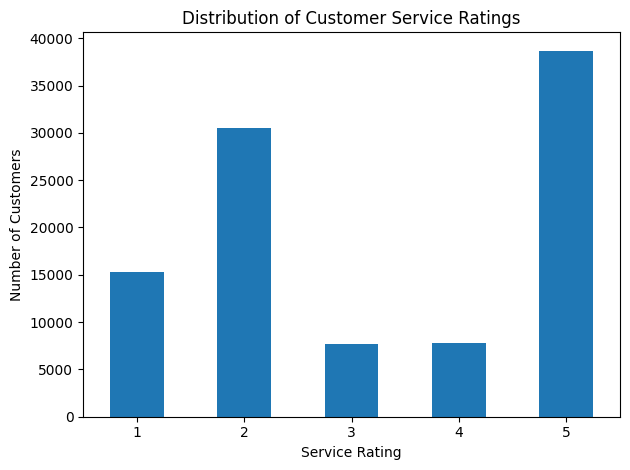

In [67]:
import matplotlib.pyplot as plt

df['Service Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Customer Service Ratings')
plt.xlabel('Service Rating')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-497146937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Delivery Delay', y='Delivery Time (Minutes)', palette='muted')


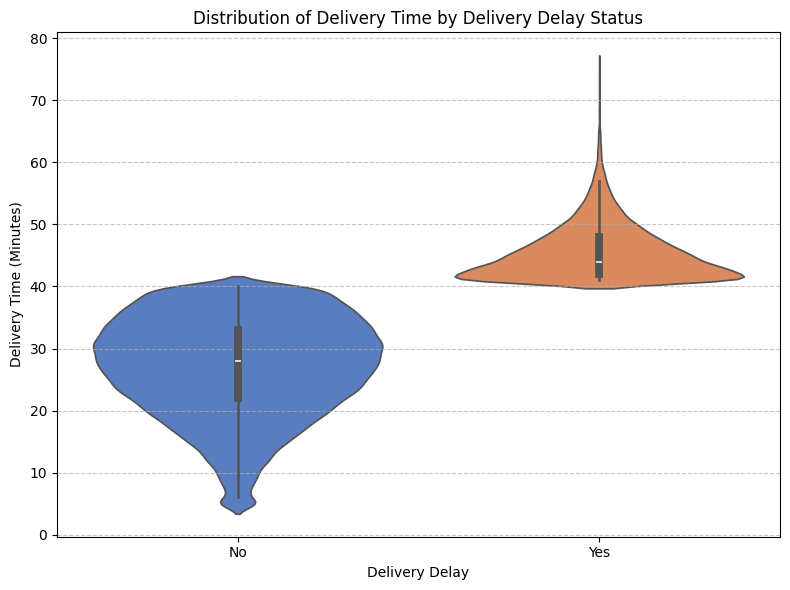

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Delivery Delay', y='Delivery Time (Minutes)', palette='muted')
plt.title('Distribution of Delivery Time by Delivery Delay Status')
plt.xlabel('Delivery Delay')
plt.ylabel('Delivery Time (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

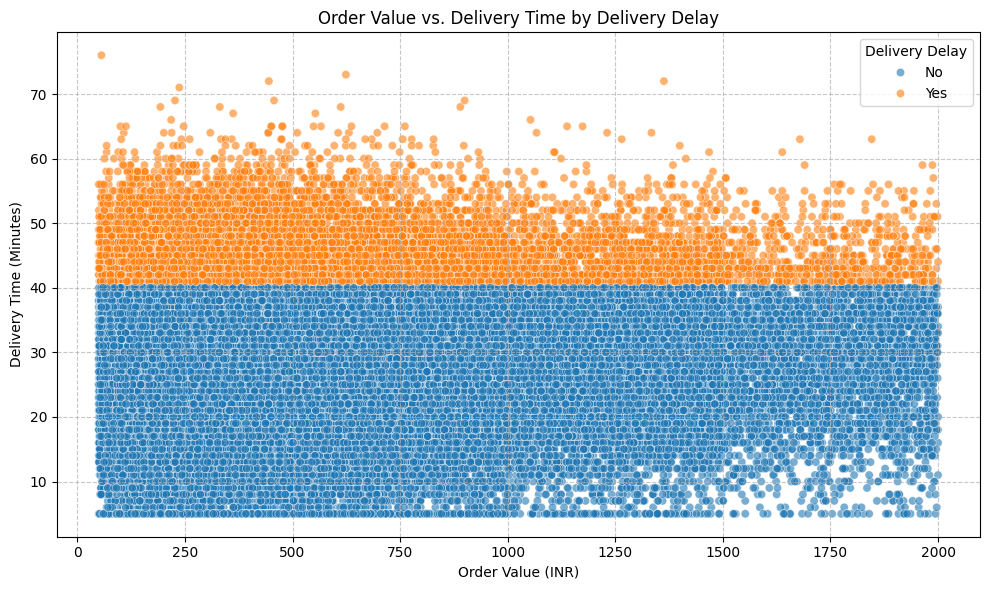

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Order Value (INR)', y='Delivery Time (Minutes)', hue='Delivery Delay', alpha=0.6)
plt.title('Order Value vs. Delivery Time by Delivery Delay')
plt.xlabel('Order Value (INR)')
plt.ylabel('Delivery Time (Minutes)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

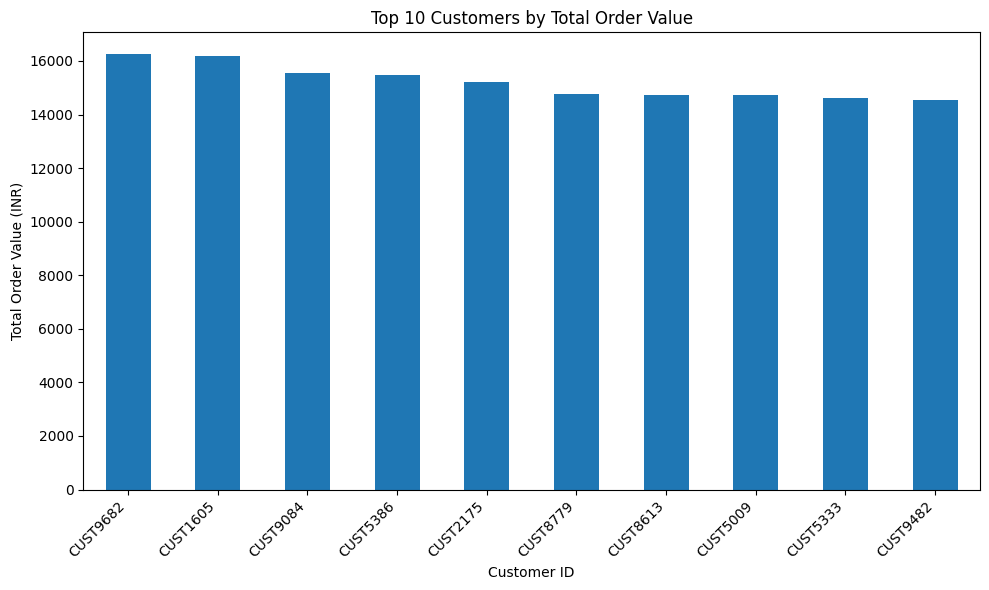

In [70]:
import matplotlib.pyplot as plt

top_customers.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Customers by Total Order Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Order Value (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

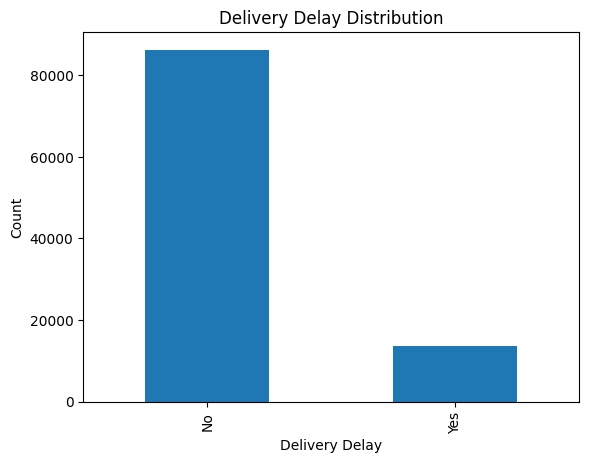

In [71]:
import matplotlib.pyplot as plt

df['Delivery Delay'].value_counts().plot(kind='bar')
plt.title('Delivery Delay Distribution')
plt.xlabel('Delivery Delay')
plt.ylabel('Count')
plt.show()

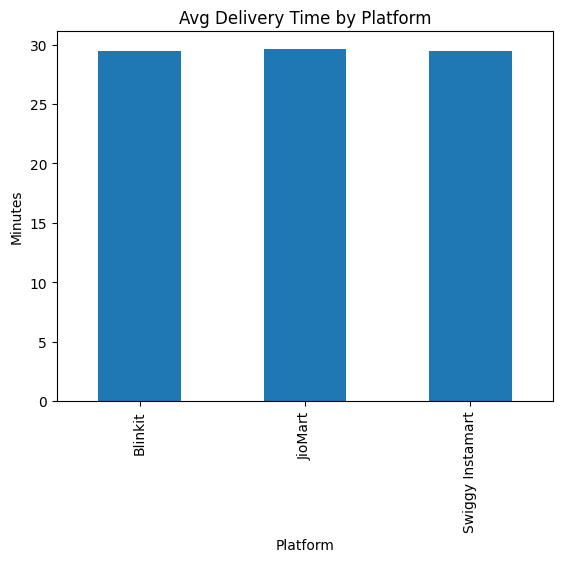

In [72]:
platform_perf.set_index('Platform')['avg_delivery_time'].plot(kind='bar')
plt.title('Avg Delivery Time by Platform')
plt.ylabel('Minutes')
plt.show()

In [73]:
#ML model for predict delivery delays

In [74]:
df['Delivery Delay'] = df['Delivery Delay'].map({'Yes':1, 'No':0})


In [75]:
features = [
    'Platform',
    'Product Category',
    'Order Value (INR)',
    'Service Rating'
]

X = df[features]
y = df['Delivery Delay']

In [76]:
X = pd.get_dummies(X, drop_first=True)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [88]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [89]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6379
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     17330
           1       0.13      0.30      0.18      2670

    accuracy                           0.64     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.77      0.64      0.69     20000



In [80]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

,0
Order Value (INR),0.847880
Service Rating,0.084809
Platform_JioMart,0.018448
Platform_Swiggy Instamart,0.018152
Product Category_Fruits & Vegetables,0.007137
Product Category_Snacks,0.006866
Product Category_Dairy,0.005849
Product Category_Grocery,0.005489
Product Category_Personal Care,0.005371


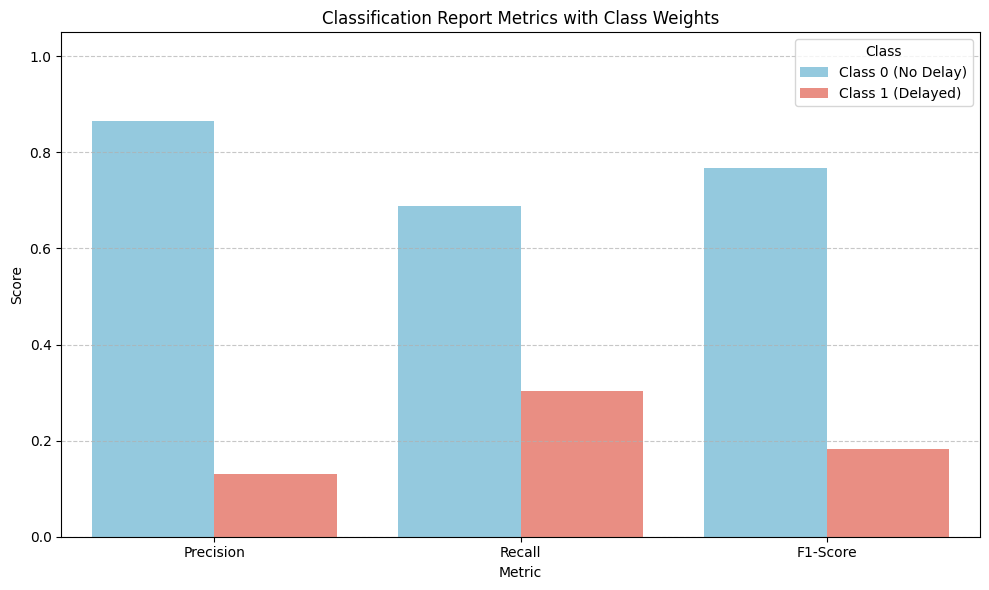

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0 (No Delay)': [report_dict['0']['precision'], report_dict['0']['recall'], report_dict['0']['f1-score']],
    'Class 1 (Delayed)': [report_dict['1']['precision'], report_dict['1']['recall'], report_dict['1']['f1-score']]
})

metrics_df_melted = metrics_df.melt(id_vars='Metric', var_name='Class', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df_melted, x='Metric', y='Score', hue='Class', palette={'Class 0 (No Delay)': 'skyblue', 'Class 1 (Delayed)': 'salmon'})
plt.title('Classification Report Metrics with Class Weights')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [81]:
# ML model for predict delivery delays